# Perceptron implementation

This code demonstrates basic implementation of a perceptron using NumPy and Pandas packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functions import *

#print(help(generate_data))
#print(help(get_weighted_sum))
#print(help(sigmoid))

In [2]:
n_features = 3
m_examples = 4
data = generate_data(m_examples, n_features, seed=15)
print('Features and labels matrix:\n---------------------------\n')
print(data, '\n\n---------------------------')
X = data.drop(columns=['targets']).values
Y = data['targets'].values
print(f'Number of features: {X.shape[1]}')
print(f'Number of training examples: {X.shape[0]}')

Features and labels matrix:
---------------------------

         x0        x1        x2  targets
0  0.692743  0.815817  0.344407        0
1  0.044838  0.571597  0.146245        1
2  0.718771  0.345357  0.457010        1
3  0.975938  0.781466  0.843790        1 

---------------------------
Number of features: 3
Number of training examples: 4


In [3]:
weights, bias = network_init(n_features, seed=18)
print('Initial network parameters:')
for i in range(len(weights)):
    print(f'w{i} = {weights[i]}')
print(f'b = {bias}')

Initial network parameters:
w0 = 0.39930576921757277
w1 = 0.7174146792882161
w2 = 0.2808233280360034
b = 0


# Forward propagation

In this section, forward propagation through the perceptron is performed 

In [4]:
def forward_prop(X, weights, bias):
    weighted_sums = []
    Y_hat = []
    for i in range(m_examples):
        example = X[i,:]
        weighted_sum = get_weighted_sum(example, weights, bias)
        weighted_sums.append(weighted_sum)
        y_hat = sigmoid(weighted_sum)
        Y_hat.append(y_hat)
    return Y_hat, weighted_sums

Y_hat, weighted_sums = forward_prop(X, weights, bias)
initial_pass = pd.DataFrame({'weighted_sum':weighted_sums, 'Y':Y, 'Y_hat':Y_hat})
print('Initial forward propagation results:\n---------------------------\n')
print(initial_pass)

Initial forward propagation results:
---------------------------

   weighted_sum  Y     Y_hat
0      0.958613  0  0.722844
1      0.469046  1  0.615158
2      0.663112  1  0.659959
3      1.187289  1  0.766256


## Cross-entropy loss

In [5]:
def cross_entropy(Y, Y_hat):
    cost = []
    for i in range(len(Y)):
        y = Y[i]
        y_hat = Y_hat[i]
        cross_entropy_loss = -(y*np.log10(y_hat) + (1-y)*np.log10(1-y_hat))
        cost.append(cross_entropy_loss)
    return cost
cross_entropy_cost = cross_entropy(Y, Y_hat)

initial_pass_with_cost = initial_pass.copy()
initial_pass_with_cost.drop(columns=['weighted_sum'], inplace=True)
initial_pass_with_cost['c-e loss'] = cross_entropy_cost
print(initial_pass_with_cost)

   Y     Y_hat  c-e loss
0  0  0.722844  0.557276
1  1  0.615158  0.211013
2  1  0.659959  0.180483
3  1  0.766256  0.115626


## Network training

This training algorithm updates weights and bias after each pass through the training data. It means, that after each training example, weights and bias are updated.

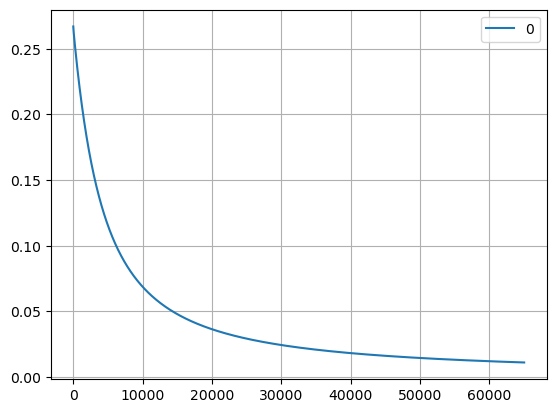

In [14]:
learning_rate = 0.1
epochs = 65000

def cross_entropy_loss(y, y_hat):
    return -(y*np.log10(y_hat) + (1-y)*np.log10(1-y_hat))

def update_weights(weights, alpha, target, prediction, feature):
    return [w + alpha*(target-prediction)*x for x, w in zip(feature, weights)]

def update_bias(bias, alpha, y, y_hat):
    return bias + alpha*(y-y_hat)
        
def train_model(X, Y, alpha=0.01, n_epoch=100):
    W, b = network_init(n_features, seed=18)
    epoch_cost = []
    for e in range(n_epoch):
        m = X.shape[0]
        individual_loss = []
        for i in range(m):
            x = X[i]
            y = Y[i]
            w_sum = get_weighted_sum(x, W, b)
            y_hat = sigmoid(w_sum)
            loss = cross_entropy_loss(y, y_hat)
            individual_loss.append(loss)
            # gradient descent
            W = update_weights(W, alpha, y, y_hat, x)
            b = update_bias(b, alpha, Y[i], y_hat)
        average_cost = sum(individual_loss)/len(individual_loss)
        epoch_cost.append(average_cost)
    return weights, bias, epoch_cost
        
final_weights, final_bias, epoch_cost = train_model(X, Y, n_epoch=epochs)

training_data = pd.DataFrame(epoch_cost)
training_data_plot = training_data.plot(kind="line", grid=True)
training_data_plot;

In [15]:
Y_hat_final, _ = forward_prop(X, final_weights, final_bias)
final_pass = pd.DataFrame({'Y':Y, 'Y_hat_final':Y_hat_final})
print('Initial forward propagation results:\n---------------------------\n')
print(initial_pass)

Initial forward propagation results:
---------------------------

   weighted_sum  Y     Y_hat
0      0.958613  0  0.722844
1      0.469046  1  0.615158
2      0.663112  1  0.659959
3      1.187289  1  0.766256
